In [7]:
! pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
sns.set_theme()



In [25]:
f_base = "20241014140946.csv_stats_history.csv"
# filename2 = "replica/20241014144523.csv_stats_history.csv"
# filename3 = "high/20241014125510.csv_stats_history.csv"
df_base_hist = pd.read_csv("./results/" + f_base, on_bad_lines="skip")
# df_hist2 = pd.read_csv("./results/" + filename2, on_bad_lines="skip")
# df_hist3 = pd.read_csv("./results/" + filename3, on_bad_lines="skip")



<Axes: xlabel='User Count'>

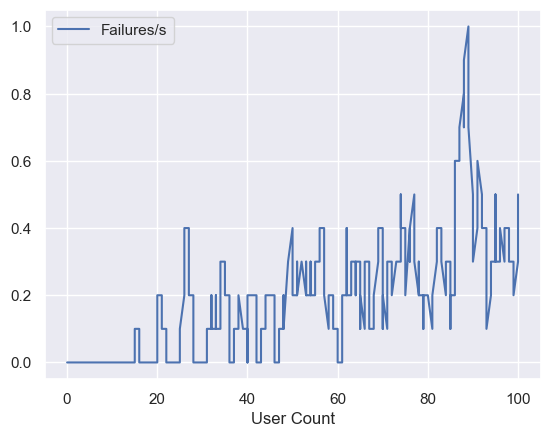

In [26]:
df_base_hist.plot(x="User Count", y="Failures/s")

In [27]:
# Check the shape format
print("==== Check the shape format ====")
print("Base Resource: " + str(df_base_hist.shape))
# print("Replica Resource: " + str(df_hist2.shape))
# print("High Resource: " + str(df_hist3.shape))
df_base_hist.head(5)
# Check Columns Names
df_base_hist.columns.values

==== Check the shape format ====
Base Resource: (571, 24)


array(['Timestamp', 'User Count', 'Type', 'Name', 'Requests/s',
       'Failures/s', '50%', '66%', '75%', '80%', '90%', '95%', '98%',
       '99%', '99.9%', '99.99%', '100%', 'Total Request Count',
       'Total Failure Count', 'Total Median Response Time',
       'Total Average Response Time', 'Total Min Response Time',
       'Total Max Response Time', 'Total Average Content Size'],
      dtype=object)

In [ ]:
# # BUG TO TEST PLOT
# df_hist2["Total Average Response Time"] = df_hist2["Total Average Response Time"] + 50
# df_hist3["Total Average Response Time"] = df_hist2["Total Average Response Time"] - 120
# df_hist2["Failures/s"] = df_hist2["Failures/s"] + 50
# df_hist3["Failures/s"] = df_hist2["Failures/s"] - 120
# df_hist2["Total Failures Count"] = df_hist2["Failures/s"] + 50
# df_hist3["Total Failures Count"] = df_hist2["Failures/s"] - 120

<Axes: >

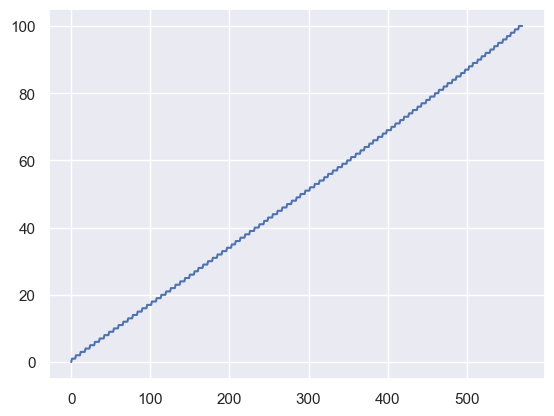

In [28]:
df_base_hist["User Count"].plot()

In [ ]:
# sns.pairplot(df_hist1)

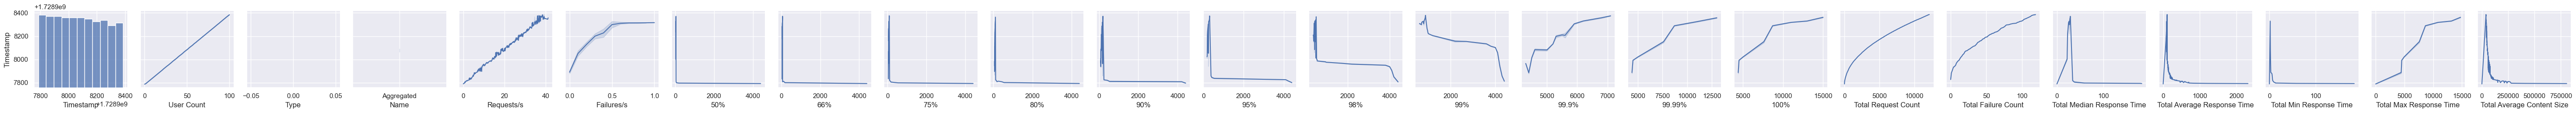

In [29]:
g=sns.PairGrid(df_base_hist, y_vars="Timestamp", x_vars=df_base_hist.columns.values)
g.map_diag(sns.histplot)
g.map_offdiag(sns.lineplot)

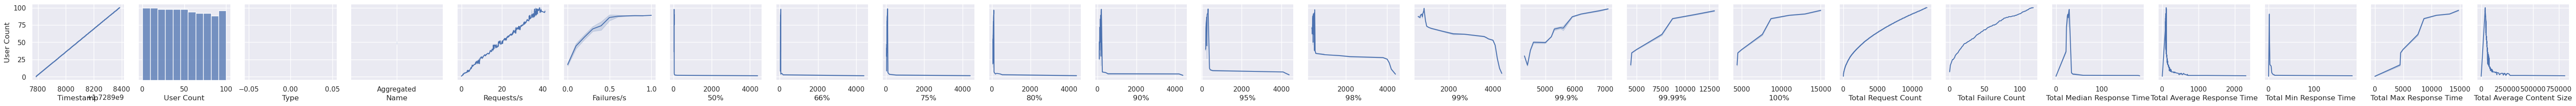

In [ ]:
# g = sns.PairGrid(df_hist1, y_vars="User Count", x_vars=df_hist1.columns.values)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.lineplot)

In [ ]:
# df_hist1.plot(x="Timestamp",y="User Count")

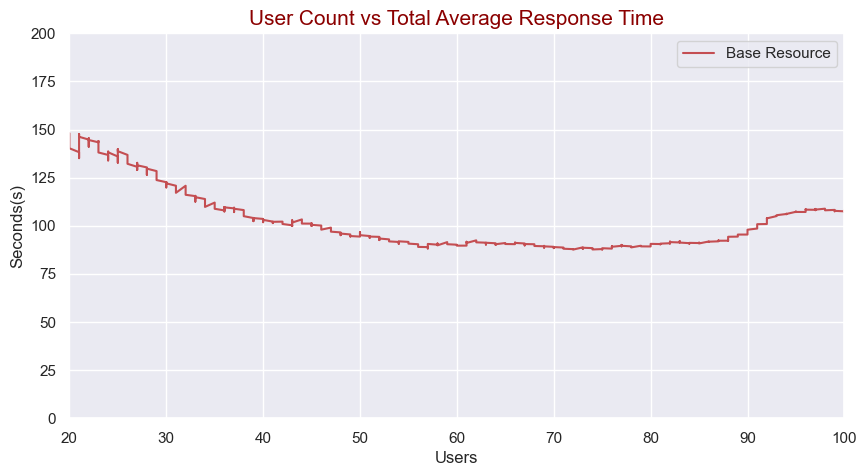

In [32]:
x = "User Count"
y = "Total Average Response Time"

font = {"family": "sans-serif", "color": "darkred", "size": 15}
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x,
        y,
        data=df_base_hist,
        color="r",
        label="Base Resource",
        # linestyle="-.",
        )
# ax.plot(
#     x,
#     y,
#     data=df_base_hist,
#     color="g",
#     label="Replica Resource",
# )
# ax.plot(
#     x,
#     y,
#     data=df_base_hist,
#     color="b",
#     label="High Resource",
# )
plt.xlabel("Users")
plt.ylabel("Seconds(s)")
plt.title(x + " vs " + y, fontdict=font)
#
plt.xlim((20, 100))
plt.ylim((0, 200))

leg = ax.legend()
# ax.legend(frameon=False, loc="lower center", ncol=2)
# fig

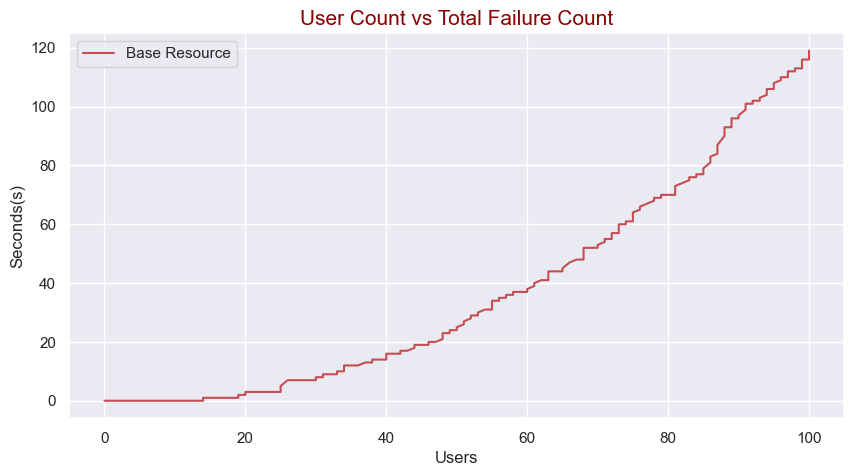

In [33]:
x="User Count"
y = "Total Failure Count"

font = {"family": "sans-serif", "color": "darkred", "size": 15}
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    x,
    y,
    data=df_base_hist,
    color="r",
    label="Base Resource",
    # linestyle="-.",
)
# ax.plot(
#     x,
#     y,
#     data=df_high_hist,
#     color="g",
#     label="Replica Resource",
# )
# ax.plot(
#     x,
#     y,
#     data=df_hist3,
#     color="b",
#     label="High Resource",
# )
plt.xlabel("Users")
plt.ylabel("Seconds(s)")
plt.title(x + " vs " + y, fontdict=font)
#


leg = ax.legend()
# ax.legend(frameon=False, loc="lower center", ncol=2)
# fig

In [60]:
f_base_mon = "20241014140946-monitoring.log"
df_base_mon = pd.read_csv("./results/" + f_base_mon, on_bad_lines="skip")
df_base_mon['date'] = pd.to_datetime(df_base_mon[' timestamp'],unit='s')

df_base_mon.head()

,name,cpu,mem,timestamp,date
0,celery,308918n,1135976Ki,1728907787,2024-10-14 12:09:47
1,geonode,4515339n,790888Ki,1728907787,2024-10-14 12:09:47
2,geoserver,1696751n,2999516Ki,1728907787,2024-10-14 12:09:47
3,memcached,299731n,7804Ki,1728907787,2024-10-14 12:09:47
4,nginx,63139n,70464Ki,1728907787,2024-10-14 12:09:47


In [61]:
# remember to # conver to minutes
df_log_hist1 = df_base_mon

df_geoserver = df_log_hist1.loc[df_log_hist1["name"] == "geoserver"]
df_geoserver["cpu_count"] = df_geoserver[" cpu"].apply(lambda x: int(x.split("n")[0]))
df_geoserver["mem_count"] = df_geoserver[" mem"].apply(
    lambda x: (int(x.split("Ki")[0]) if "Ki" in x else int(x.split("Mi")[0]) * 1024)
)
df_pycsw = df_log_hist1.loc[df_log_hist1["name"] == "pycsw"]
df_pycsw["cpu_count"] = df_pycsw[" cpu"].apply(lambda x: int(x.split("n")[0]))
df_pycsw["mem_count"] = df_pycsw[" mem"].apply(
    lambda x: (int(x.split("Ki")[0]) if "Ki" in x else int(x.split("Mi")[0]) * 1024)
)
df_geonode = df_log_hist1.loc[df_log_hist1["name"] == "geonode"]
df_geonode["cpu_count"] = df_geonode[" cpu"].apply(lambda x: int(x.split("n")[0]))
df_geonode["mem_count"] = df_geonode[" mem"].apply(
    lambda x: (int(x.split("Ki")[0]) if "Ki" in x else int(x.split("Mi")[0]) * 1024)
)
df_celery = df_log_hist1.loc[df_log_hist1["name"] == "celery"]
df_celery["cpu_count"] = df_celery[" cpu"].apply(lambda x: int(x.split("n")[0]))
df_celery["mem_count"] = df_celery[" mem"].apply(
    lambda x: (int(x.split("Ki")[0]) if "Ki" in x else int(x.split("Mi")[0]) * 1024)
)
df_postgres = df_log_hist1.loc[df_log_hist1["name"] == "postgres"]
df_postgres["cpu_count"] = df_postgres[" cpu"].apply(lambda x: int(x.split("n")[0]))
df_postgres["mem_count"] = df_postgres[" mem"].apply(
    lambda x: (int(x.split("Ki")[0]) if "Ki" in x else int(x.split("Mi")[0]) * 1024)
)
df_nginx = df_log_hist1.loc[df_log_hist1["name"] == "nginx"]
df_nginx["cpu_count"] = df_nginx[" cpu"].apply(lambda x: int(x.split("n")[0]))
df_nginx["mem_count"] = df_nginx[" mem"].apply(
    lambda x: (int(x.split("Ki")[0]) if "Ki" in x else int(x.split("Mi")[0]) * 1024)
)
df_rabbitmq = df_log_hist1.loc[df_log_hist1["name"] == "rabbitmq"]
df_rabbitmq["cpu_count"] = df_rabbitmq[" cpu"].apply(lambda x: int(x.split("n")[0]))
df_rabbitmq["mem_count"] = df_rabbitmq[" mem"].apply(
    lambda x: (int(x.split("Ki")[0]) if "Ki" in x else int(x.split("Mi")[0]) * 1024)
)
df_memcached = df_log_hist1.loc[df_log_hist1["name"] == "memcached"]
df_memcached["cpu_count"] = df_memcached[" cpu"].apply(lambda x: int(x.split("n")[0]))
df_memcached["mem_count"] = df_memcached[" mem"].apply(
    lambda x: (int(x.split("Ki")[0]) if "Ki" in x else int(x.split("Mi")[0]) * 1024)
)

/tmp/ipykernel_376560/2641090209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geoserver["cpu_count"] = df_geoserver[" cpu"].apply(lambda x: int(x.split("n")[0]))
/tmp/ipykernel_376560/2641090209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geoserver["mem_count"] = df_geoserver[" mem"].apply(
/tmp/ipykernel_376560/2641090209.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

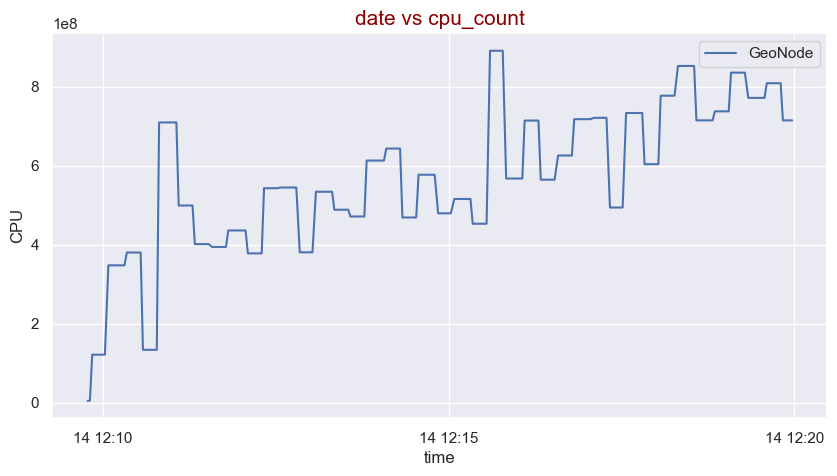

In [67]:
y = "cpu_count"
x = "date"

font = {"family": "sans-serif", "color": "darkred", "size": 15}
fig, ax = plt.subplots(figsize=(10, 5))

# ax.plot(
#     x,
#     y,
#     data=df_geoserver,
#     color="r",
#     label="GeoServer",
#     # linestyle="-.",
# )
ax.plot(
    x,
    y,
    data=df_geonode,
    #color="g",
    label="GeoNode",
)
# ax.plot(
#     x,
#     y,
#     data=df_celery,
#     #color="b",
#     label="Celery",
# )
# ax.plot(
#     x,
#     y,
#     data=df_memcached,
#     #color="b",
#     label="MemCached",
# )
# ax.plot(
#     x,
#     y,
#     data=df_nginx,
#    # color="b",
#     label="Nginx",
# )
# ax.plot(
#     x,
#     y,
#     data=df_rabbitmq,
#     #color="b",
#     label="RabbitMQ",
# )
# ax.plot(
#     x,
#     y,
#     data=df_postgres,
#     #color="b",
#     label="Postgres",
# )
plt.xlabel("time")
plt.ylabel("CPU")
plt.title(x + " vs " + y, fontdict=font)
leg = ax.legend()

In [64]:
merged_df = df_geonode.merge(df_geoserver, on=' timestamp', how='inner')
m_df = merged_df["cpu_count_x"] + merged_df["cpu_count_y"]
m_df.head()

0      6212090
1      6212090
2    122674933
3    122674933
4    122674933
dtype: int64

In [54]:
df_base_mon[' timestamp']

0      2024-10-14 12:09:47
1      2024-10-14 12:09:47
2      2024-10-14 12:09:47
3      2024-10-14 12:09:47
4      2024-10-14 12:09:47
               ...        
2071   2024-10-14 12:19:55
2072   2024-10-14 12:19:58
2073   2024-10-14 12:19:58
2074   2024-10-14 12:19:58
2075   2024-10-14 12:19:58
Name:  timestamp, Length: 2076, dtype: datetime64[ns]

In [ ]:
df_geonode["mem_count"] = df_geonode[" mem"].apply(
    lambda x: (
        int(x.split("Ki")[0])
        if "Ki" in x
        else int(x.split("Mi")[0]) * 1024 
    )
)

/tmp/ipykernel_3072911/3510568442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geonode["mem_count"] = df_geonode[" mem"].apply(


In [ ]:
df_geonode["cpu_count"].describe()

count    2.600000e+02
mean     5.664920e+08
std      1.817084e+08
min      4.515339e+06
25%      4.685796e+08
50%      5.642121e+08
75%      7.144022e+08
max      8.906691e+08
Name: cpu_count, dtype: float64

In [ ]:
df_geonode["cpu_per_second"].describe()

KeyError: 'cpu_per_second'

<Axes: >

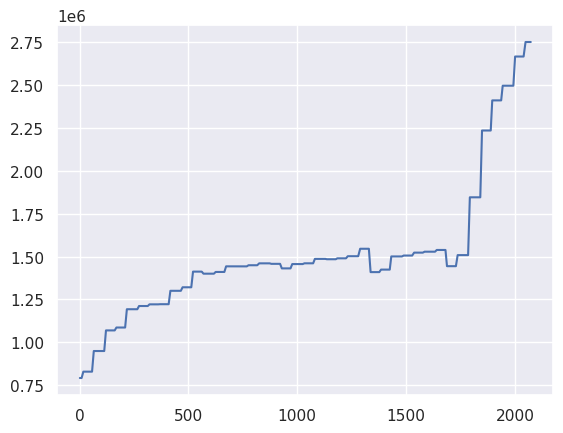

In [ ]:
df_geonode["mem_count"].plot()
# df_geonode.plot()

In [ ]:
df_geonode["cpu_per_second"] = (df_geonode["cpu_count"] / df_geonode[" timestamp"])

/tmp/ipykernel_3072911/4227852180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geonode["cpu_per_second"] = (df_geonode["cpu_count"] / df_geonode[" timestamp"])


Text(0.5, 1.0, ' timestamp vs cpu_per_second')

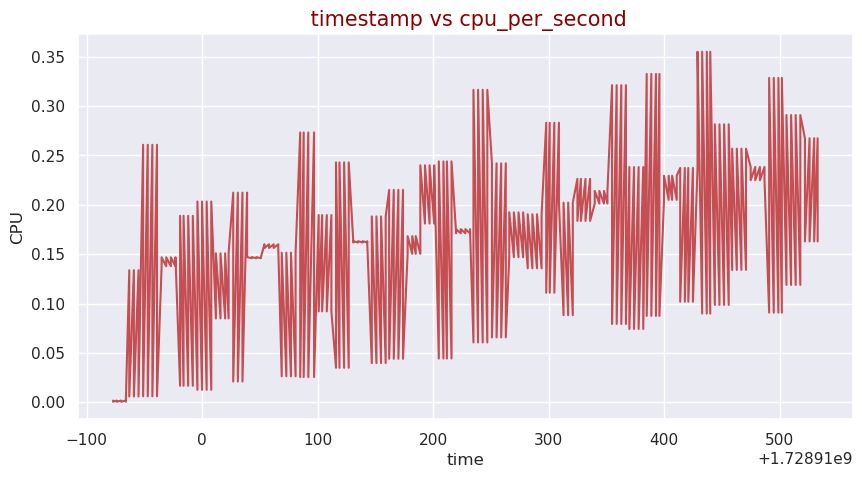

In [ ]:
y = "cpu_per_second"
x = " timestamp"

font = {"family": "sans-serif", "color": "darkred", "size": 15}
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    x,
    y,
    data=df_geonode,
    color="r",
    label="Base Resource",
    # linestyle="-.",
)
# ax.plot(
#     x,
#     y,
#     data=df_hist2,
#     color="g",
#     label="Replica Resource",
# )
# ax.plot(
#     x,
#     y,
#     data=df_hist3,
#     color="b",
#     label="High Resource",
# )
plt.xlabel("time")
plt.ylabel("CPU")
plt.title(x + " vs " + y, fontdict=font)
# #


# leg = ax.legend()
# ax.legend(frameon=False, loc="lower center", ncol=2)
# fig

Text(0.5, 1.0, ' timestamp vs mem_count')

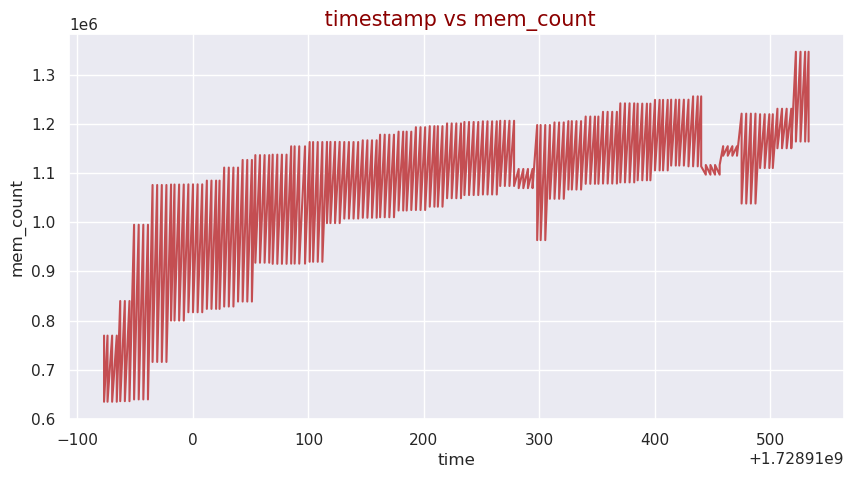

In [ ]:
y = "mem_count"
x = " timestamp"

font = {"family": "sans-serif", "color": "darkred", "size": 15}
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    x,
    y,
    data=df_geonode,
    color="r",
    label="Base Resource",
    # linestyle="-.",
)
# ax.plot(
#     x,
#     y,
#     data=df_hist2,
#     color="g",
#     label="Replica Resource",
# )
# ax.plot(
#     x,
#     y,
#     data=df_hist3,
#     color="b",
#     label="High Resource",
# )
plt.xlabel("time")
plt.ylabel("mem_count")
plt.title(x + " vs " + y, fontdict=font)
# #


# leg = ax.legend()
# ax.legend(frameon=False, loc="lower center", ncol=2)
# fig

NameError: name 'df_hist' is not defined

<Axes: ylabel='Timestamp'>

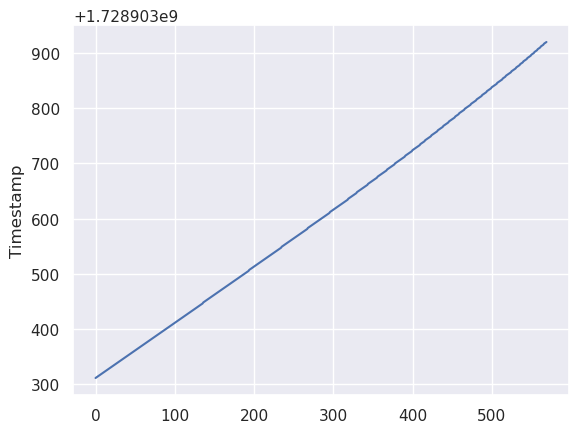

<Axes: >

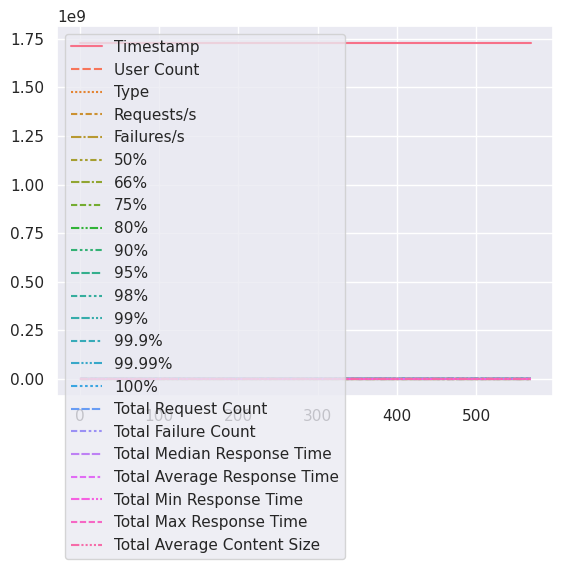

<Axes: xlabel='Timestamp', ylabel='User Count'>

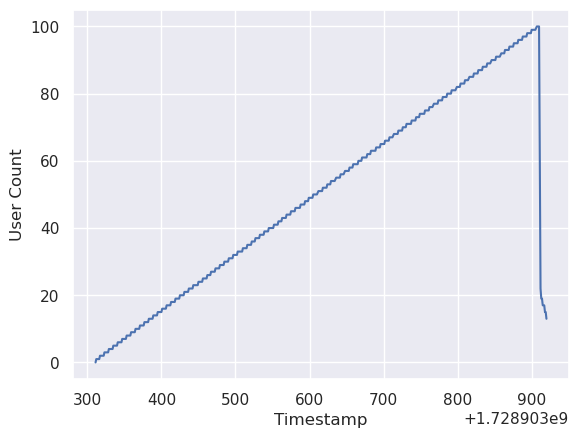

<Axes: xlabel='Timestamp', ylabel='Total Request Count'>

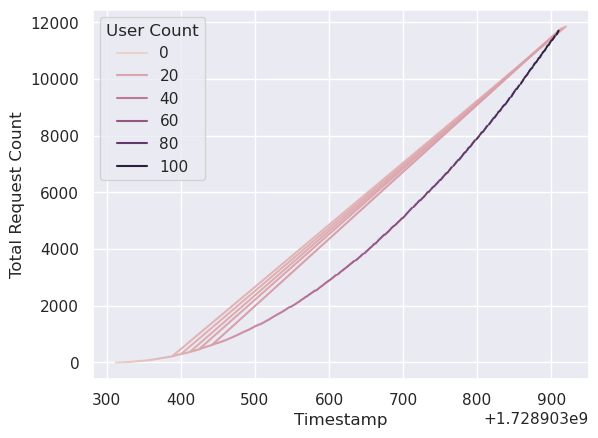

In [ ]:
#agregated by user
sns.lineplot(data=df_hist, x="Timestamp", y="Total Request Count", hue="User Count")

In [ ]:
# user1 = df_hist.query("User Count == '1,'")
# user1.plot(x="Timestamp",y="User Count")

In [ ]:
# col = 'A'
# df2 = df.drop(col,axis=1)
# df2.index = df[col]
# df2.plot(subplots=True, style='.')
# plt.legend(loc='best')
# plt.show()